In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress,chi2_contingency
import scipy.stats as st

# Path where csv file is located
data_path = "../csv_file/WA_Fn-UseC_-Telco-Customer-Churn.csv" 
#Reading the csv file
data_churn = pd.read_csv(data_path)
#Reading csv file
data_churn.head() 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Unnamed: 21
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,33.17822651
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,2.008356546
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,43.51654846
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,2.144978784


In [3]:
# Checking the number of customerid.
customerid_count=len(data_churn['customerID'].value_counts())
customerid_count

7043

In [4]:
#Counting unique values
unique_customerID = data_churn['customerID'].nunique()
unique_customerID

7043

In [5]:
#CHecking shape
data_churn.shape

(7043, 22)

In [6]:
#checking columns
data_churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Unnamed: 21'],
      dtype='object')

In [7]:
#Getting information from dataframe
data_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
#Counting cell in the total of columns
data_churn.count()

customerID          7043
gender              7043
SeniorCitizen       7043
Partner             7043
Dependents          7043
tenure              7043
PhoneService        7043
MultipleLines       7043
InternetService     7043
OnlineSecurity      7043
OnlineBackup        7043
DeviceProtection    7043
TechSupport         7043
StreamingTV         7043
StreamingMovies     7043
Contract            7043
PaperlessBilling    7043
PaymentMethod       7043
MonthlyCharges      7043
TotalCharges        7043
Churn               7043
Unnamed: 21         7043
dtype: int64

In [9]:
#Verifying cell in blank
blank_cells = data_churn.applymap(lambda x: pd.isna(x) or x == '')
print(blank_cells)

      customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0          False   False          False    False       False   False   
1          False   False          False    False       False   False   
2          False   False          False    False       False   False   
3          False   False          False    False       False   False   
4          False   False          False    False       False   False   
...          ...     ...            ...      ...         ...     ...   
7038       False   False          False    False       False   False   
7039       False   False          False    False       False   False   
7040       False   False          False    False       False   False   
7041       False   False          False    False       False   False   
7042       False   False          False    False       False   False   

      PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0            False          False            False          

C:\Users\eek_e\AppData\Local\Temp\ipykernel_16456\3782148306.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  blank_cells = data_churn.applymap(lambda x: pd.isna(x) or x == '')


In [10]:
#Since we got an error while converting to float. so we are just adding 0 to the empty cells and corverting the column to float
data_churn['TotalCharges'] = pd.to_numeric(data_churn['TotalCharges'], errors='coerce')
data_churn['TotalCharges'] = data_churn['TotalCharges'].fillna(0)
data_churn['TotalCharges'] = data_churn['TotalCharges'].astype(float)
data_churn.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
#counting how many cells are == 0
count_totalcharges_0_values = (data_churn['TotalCharges'] == 0).sum()
count_totalcharges_0_values

11

In [12]:
#droping rows where TotalCharges==0
data_churn = data_churn[data_churn['TotalCharges'] != 0]
data_churn.count()

customerID          7032
gender              7032
SeniorCitizen       7032
Partner             7032
Dependents          7032
tenure              7032
PhoneService        7032
MultipleLines       7032
InternetService     7032
OnlineSecurity      7032
OnlineBackup        7032
DeviceProtection    7032
TechSupport         7032
StreamingTV         7032
StreamingMovies     7032
Contract            7032
PaperlessBilling    7032
PaymentMethod       7032
MonthlyCharges      7032
TotalCharges        7032
Churn               7032
Unnamed: 21         7032
dtype: int64

In [13]:
#dropping customerID since we don't need it. We are going to use the default index as unique key.
data_churn = data_churn.drop(columns=['customerID'])
data_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Unnamed: 21
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,33.17822651
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,2.008356546
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,43.51654846
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,2.144978784


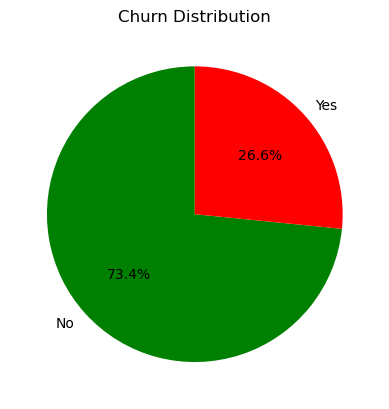

In [15]:
#PLoting Churn Distribution
test = data_churn['Churn'].value_counts()
label = ['No', 'Yes']
plt.pie(test,labels=label, autopct='%1.1f%%',colors=['green', 'red'],startangle=90)
plt.title('Churn Distribution')
# plt.savefig("Plot/ChurnDistribution.png")
plt.show()

In [16]:
#describing the data only 2 numerical columns
data_churn[['MonthlyCharges', 'tenure']].describe().T

,count,mean,std,min,25%,50%,75%,max
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.35,89.8625,118.75
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.00,55.0000,72.00


In [17]:
#Senior and Non-Senior Citizens Churn Table 
senior_churn_rate = data_churn.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack() # taking this from https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html
senior_churn_rate['No'] = senior_churn_rate['No']*100
senior_churn_rate['Yes'] = senior_churn_rate['Yes']*100
senior_churn_rate

Churn,No,Yes
SeniorCitizen,,
0,76.349745,23.650255
1,58.318739,41.681261


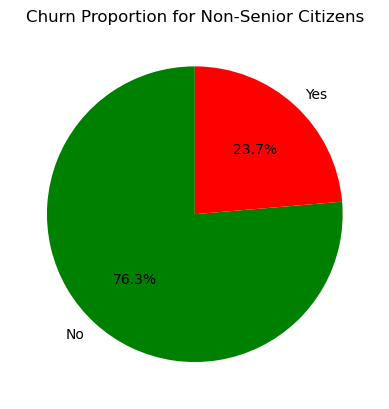

In [19]:
# Churn Proportion for Non-Senior Citizens Pie
label = ['No', 'Yes']
non_senior_churn = senior_churn_rate.loc[0] 
plt.pie(non_senior_churn, labels=label, autopct='%1.1f%%',colors=['green', 'red'],startangle=90)
plt.title('Churn Proportion for Non-Senior Citizens')
# plt.savefig("Plot/Churn Proportion for Non-Senior Citizens.png")
plt.show()


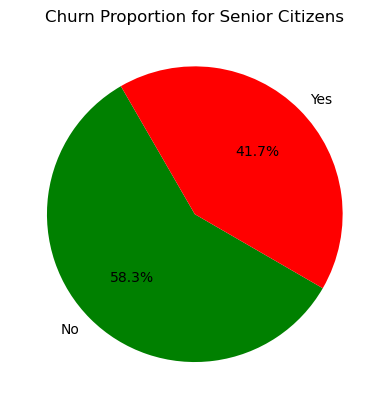

In [21]:
# Churn Proportion for Senior Citizens Pie
label = ['No', 'Yes']
senior_churn = senior_churn_rate.loc[1] 
plt.pie(senior_churn, labels=label, autopct='%1.1f%%',colors=['green', 'red'],startangle=120)
plt.title('Churn Proportion for Senior Citizens')
# plt.savefig("Plot/Churn Proportion for Senior Citizens.png")
plt.show()

<Axes: xlabel='SeniorCitizen', ylabel='Proportion'>

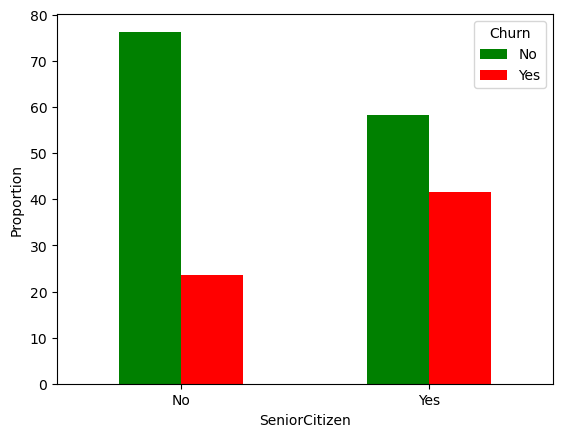

In [22]:
#Churn Proportion for Non-Senior and Senior Citizens Bar Chart
senior_churn_rate.index = senior_churn_rate.index.map({0: 'No', 1: 'Yes'})
senior_churn_rate.plot(kind="bar", ylabel='Proportion', xlabel='SeniorCitizen', color=['green', 'red'],rot=0)
# plt.savefig("Plot/Churn Proportion Bar.png")

In [23]:
# Perform chi-square test
contingency_table = pd.crosstab(data_churn['SeniorCitizen'], data_churn['Churn'])
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print("chi2_stat-value:", chi2_stat)
print("P-value:", p_value)
print("dof-value:", dof)

chi2_stat-value: 158.4408162893713
P-value: 2.4792557203954705e-36
dof-value: 1


In [24]:
# counting how many additional services the customers have and calculating churn rate for each group
additional_services = ['StreamingTV', 'StreamingMovies', 'DeviceProtection', 'TechSupport','OnlineBackup','OnlineSecurity']
data_churn['number_additional_services'] = data_churn[additional_services].apply(lambda x: x.eq('Yes').sum(), axis=1)
additional_services_churn_rate = data_churn.groupby('number_additional_services')['Churn'].value_counts(normalize=True).unstack().fillna(0)


In [25]:
# Perform chi-square test for qualitative (categorical) Column
contingency_table_services = pd.crosstab(data_churn['number_additional_services'], data_churn['Churn'])
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table_services)
print("chi2_stat-value:", chi2_stat)
print("P-value:", p_value)
print("dof-value:", dof)

chi2_stat-value: 389.04415274003037
P-value: 6.3315288479146875e-81
dof-value: 6


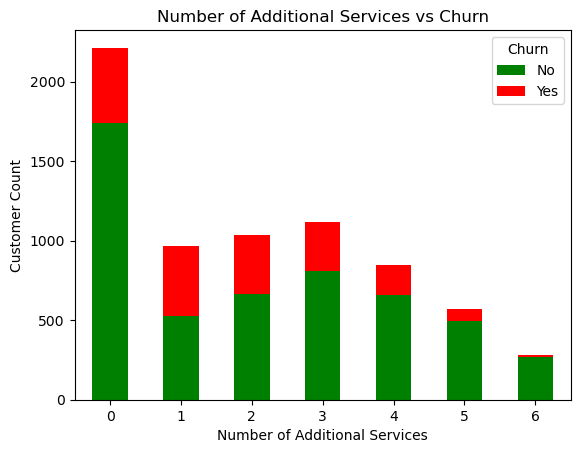

In [26]:
#Number of Additional Services vs Churn BarChart
services_churn_counts = data_churn.groupby('number_additional_services')['Churn'].value_counts().unstack()
services_churn_counts.plot(kind='bar', stacked=True,color=['green', 'red'],rot=0)
plt.title('Number of Additional Services vs Churn')
plt.xlabel('Number of Additional Services')
plt.ylabel('Customer Count')
plt.legend(title='Churn', loc='upper right')
# plt.savefig("Plot/Number of Additional Services vs Churn.png")
plt.show()

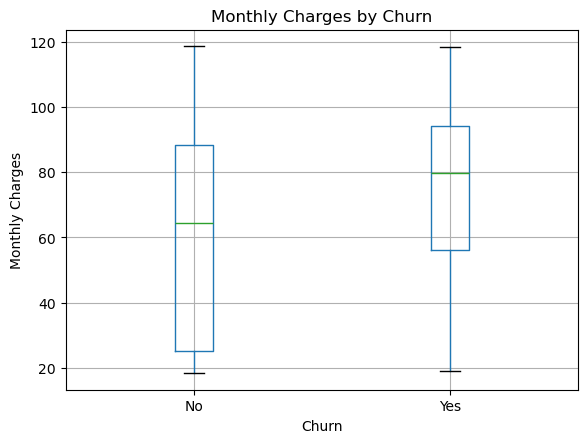

In [27]:
#Monthly Charges by Churn Box Plot
data_churn.boxplot(column='MonthlyCharges', by='Churn')
plt.title('Monthly Charges by Churn')
plt.suptitle('')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
# plt.savefig("Plot/Monthly Charges by Churnboxplot.png")
plt.show()

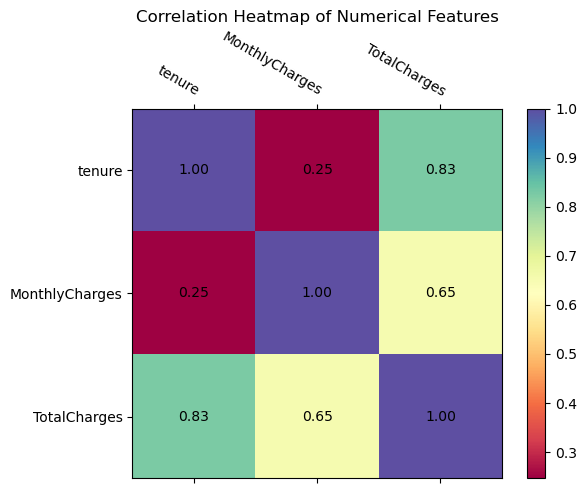

In [29]:
# Selecting numerical columns for the correlation matrix and Plotting the heatmap- Using this page as guide https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html
fig, ax = plt.subplots()
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
correlation_matrix = data_churn[numerical_columns].corr()
cax = ax.matshow(correlation_matrix, cmap='Spectral')
plt.colorbar(cax)
ax.set_xticks(np.arange(len(numerical_columns)))
ax.set_yticks(np.arange(len(numerical_columns)))
ax.set_xticklabels(numerical_columns,rotation=-30, ha="right", rotation_mode="anchor")
ax.set_yticklabels(numerical_columns)

for i in range(len(numerical_columns)):
    for j in range(len(numerical_columns)):
        plt.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}", ha='center', va='center', color='black')

plt.title('Correlation Heatmap of Numerical Features')
# plt.savefig("Plot/Correlation Heatmap of Numerical Features.png")
plt.show()